In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')
sys.path.append('C://Users//DavidB//PycharmProjects//My_Football_Analytics//Position_data')

import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softplus
import Data.Metrica_IO as mio
from Tracking_Data import tracking_data
import pitch_control

## set GPU or CPU (uncomment second line to use CPU)
# device = torch.device('cuda:0'); dtype = torch.float16
device = 'cpu'; dtype = torch.float32

In [2]:
# supposed to be based on td_object --> first create one
# everywhere we call the object now will later be self

data_dir = 'sample-data-master/data/'
game_id = 1
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='mplsoccer')
td_object.get_velocities()

td_object

Reading team: away
Reading team: home


In [3]:
pc, S, h, wi = pitch_control.tensor_pitch_control(td_object)

Current batch: 1/2
Current batch: 2/2


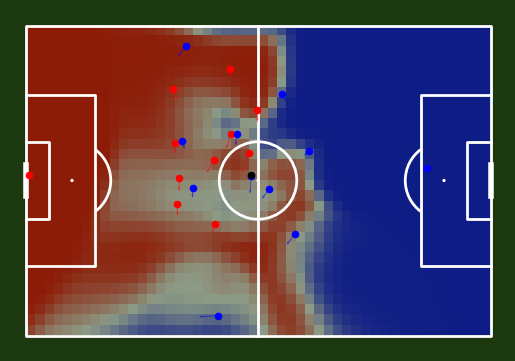

In [10]:
cmap = 'bwr'

fig, ax = td_object.plot_players(frame=100, velocities=True)
ax.imshow(np.flipud(pc[100].rot90()), extent=(
   td_object.x_range_pitch[0], td_object.x_range_pitch[1], td_object.y_range_pitch[1],
          td_object.y_range_pitch[0]), cmap=cmap, alpha=0.5, vmin=0.0, vmax=1.0)


In [6]:
td_object.dimensions

{'y': {'data': (1, 0),
  'pitch': (80, 0),
  'home_columns': ['Home_11_y',
   'Home_1_y',
   'Home_2_y',
   'Home_3_y',
   'Home_4_y',
   'Home_5_y',
   'Home_6_y',
   'Home_7_y',
   'Home_8_y',
   'Home_9_y',
   'Home_10_y',
   'Home_12_y',
   'Home_13_y',
   'Home_14_y'],
  'away_columns': ['Away_25_y',
   'Away_15_y',
   'Away_16_y',
   'Away_17_y',
   'Away_18_y',
   'Away_19_y',
   'Away_20_y',
   'Away_21_y',
   'Away_22_y',
   'Away_23_y',
   'Away_24_y',
   'Away_26_y',
   'Away_27_y',
   'Away_28_y'],
  'ball_columns': ['ball_y'],
  'delta_data': -1,
  'delta_pitch': -80,
  'scaling_factor': 80.0},
 'x': {'data': (0, 1),
  'pitch': (0, 120),
  'home_columns': ['Home_11_x',
   'Home_1_x',
   'Home_2_x',
   'Home_3_x',
   'Home_4_x',
   'Home_5_x',
   'Home_6_x',
   'Home_7_x',
   'Home_8_x',
   'Home_9_x',
   'Home_10_x',
   'Home_12_x',
   'Home_13_x',
   'Home_14_x'],
  'away_columns': ['Away_25_x',
   'Away_15_x',
   'Away_16_x',
   'Away_17_x',
   'Away_18_x',
   'Away_19_x

In [ ]:
y